In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
a=[23,25,28,28,32,33,35,28,29,32,28,29,30,27,28,29,29,28,30,28]
b=[16,24,26,26,26,27,28,35,18,45,50,16,15,15,17,34,38,45,30,44]


print(np.mean(a))
print(np.mean(b))

28.95
28.75


In [3]:
# range oof a
print(max(a)-min(a))

12


In [4]:
# range of b
print(max(b)-min(b))

35


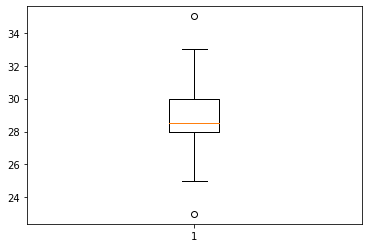

In [5]:
plt.boxplot(a)
plt.show()

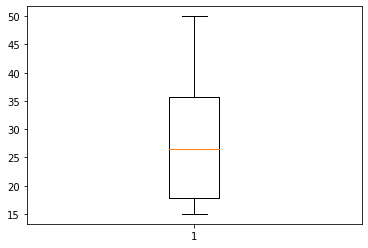

In [6]:
plt.boxplot(b)
plt.show()

In [7]:

# Interquartile range (IQR) of a
stats.iqr(a, interpolation = 'midpoint')


2.0

In [8]:
# Interquartile range (IQR) of b

stats.iqr(b, interpolation = 'midpoint')

19.0

In [9]:
dfa=pd.DataFrame({'Number':a})

In [10]:
dfa.describe()

,Number
count,20.000000
mean,28.950000
std,2.665076
min,23.000000
25%,28.000000
50%,28.500000
75%,30.000000
max,35.000000


In [11]:
q1=dfa.Number.quantile(0.25)
q3=dfa.Number.quantile(0.75)

In [12]:
q1,q3

(28.0, 30.0)

In [13]:
iqr=q3-q1

In [14]:
iqr

2.0

In [15]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

lower_limit, upper_limit

(25.0, 33.0)

In [16]:
# outliers

dfa[(dfa.Number < lower_limit)| (dfa.Number > upper_limit)]

,Number
0,23
6,35


In [17]:
dfb=pd.DataFrame({'Number':b})

dfb.describe()

,Number
count,20.000000
mean,28.750000
std,11.172688
min,15.000000
25%,17.750000
50%,26.500000
75%,35.750000
max,50.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1bf8acfd310>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf8acfd9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf8acf0f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf8ad0a0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf8ad0a430>],
 'means': []}

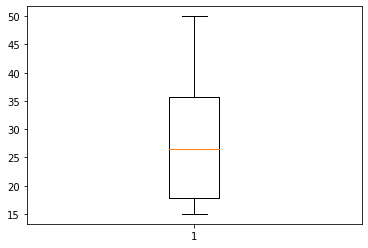

In [18]:
plt.boxplot(dfb)

In [19]:
q1=dfb.Number.quantile(0.25)
q3=dfb.Number.quantile(0.75)
q1,q3

(17.75, 35.75)

In [20]:
iqr=q3-q1
iqr

18.0

In [21]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

lower_limit, upper_limit

(-9.25, 62.75)

In [22]:
# outliers

dfb[(dfb.Number < lower_limit)| (dfb.Number > upper_limit)]

,Number


In [23]:
# remove outlier

dfb_clean = dfb[(dfb.Number > lower_limit) & (dfb.Number < upper_limit)]
dfb_clean

,Number
0,16
1,24
2,26
3,26
4,26
5,27
6,28
7,35
8,18
9,45


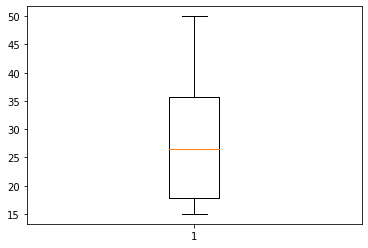

In [24]:
plt.boxplot(dfb_clean)
plt.show()

### IQR using z-score

In [31]:
q1 = -0.675*2.665076 + 28.950000
q3 = 0.675*2.665076 + 28.950000
q1,q3

(27.151073699999998, 30.7489263)

In [32]:
IQR=q3-q1
IQR

3.597852600000003